# Water pump data predictions

## Group:
    
- Isaac Gonzales Vizcarra
- Ibrahim Sobh
- Anthony Siampiringue


## Dataset:
    https://www.kaggle.com/datasets/nphantawee/pump-sensor-data
        
## Description:
- Data driven prediction models of water pump sensor.

## Anomalies:
- Detect atypical peak when compared to surrounding past measurements that are lower. 
- Detect RECOVERING and BROKEN status         

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (15, 5)

In [18]:
data = pd.read_csv("../dataset/sensor.csv", parse_dates=["timestamp"], index_col="timestamp")
data_df = data.copy()
data_df.head()

,Unnamed: 0,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-04-01 00:00:00,0,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2018-04-01 00:01:00,1,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2018-04-01 00:02:00,2,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
2018-04-01 00:03:00,3,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
2018-04-01 00:04:00,4,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [19]:
data_df.drop(columns=['Unnamed: 0', 'sensor_15'], inplace=True)
data_df.columns

Index(['sensor_00', 'sensor_01', 'sensor_02', 'sensor_03', 'sensor_04',
       'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08', 'sensor_09',
       'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14',
       'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20',
       'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24', 'sensor_25',
       'sensor_26', 'sensor_27', 'sensor_28', 'sensor_29', 'sensor_30',
       'sensor_31', 'sensor_32', 'sensor_33', 'sensor_34', 'sensor_35',
       'sensor_36', 'sensor_37', 'sensor_38', 'sensor_39', 'sensor_40',
       'sensor_41', 'sensor_42', 'sensor_43', 'sensor_44', 'sensor_45',
       'sensor_46', 'sensor_47', 'sensor_48', 'sensor_49', 'sensor_50',
       'sensor_51', 'machine_status'],
      dtype='object')

## Pump nomalies

In [20]:
data_df["machine_status"].value_counts()


NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: machine_status, dtype: int64

In [21]:
from sklearn.preprocessing import LabelEncoder

encod = LabelEncoder()
encod.fit(data_df['machine_status'])

data_df_encod_t = data_df.copy()
data_df_encod = data_df_encod_t.drop(columns=['machine_status'])
data_df_encod_labels = encod.transform(data_df['machine_status'])


data_df_encod.head()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889
2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889
2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,...,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037
2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,...,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250
2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,...,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889


In [22]:
encod.inverse_transform([0,1,2])

array(['BROKEN', 'NORMAL', 'RECOVERING'], dtype=object)

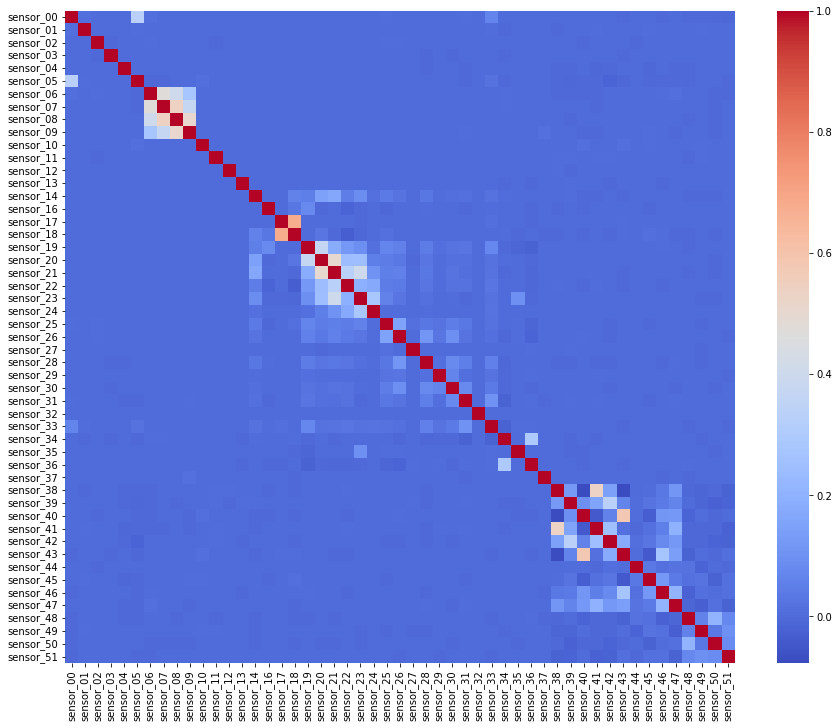

In [23]:
plt.rcParams['figure.figsize'] = (15, 12)
sns.heatmap(data_df_encod.bfill().pct_change().corr(), cmap='coolwarm');

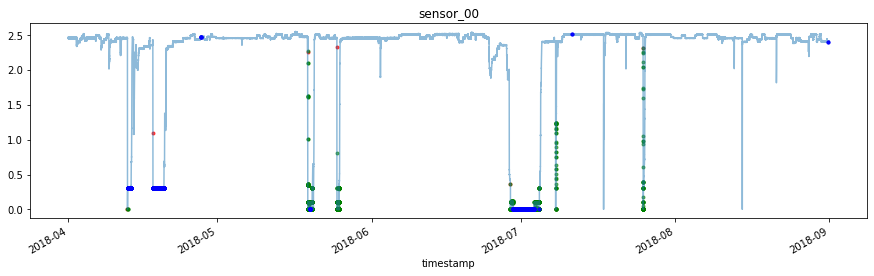

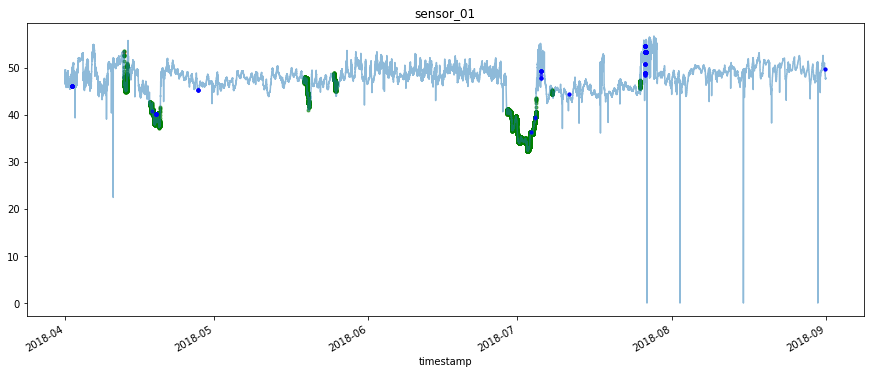

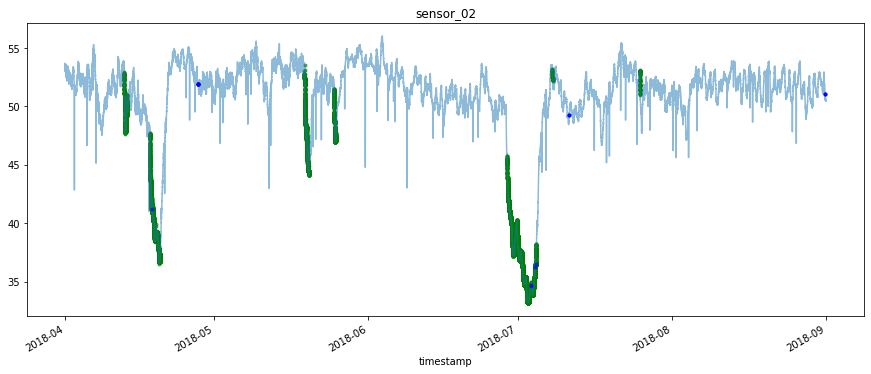

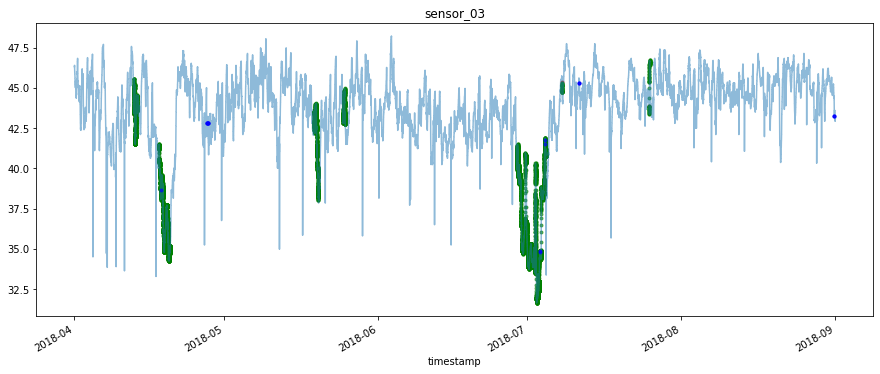

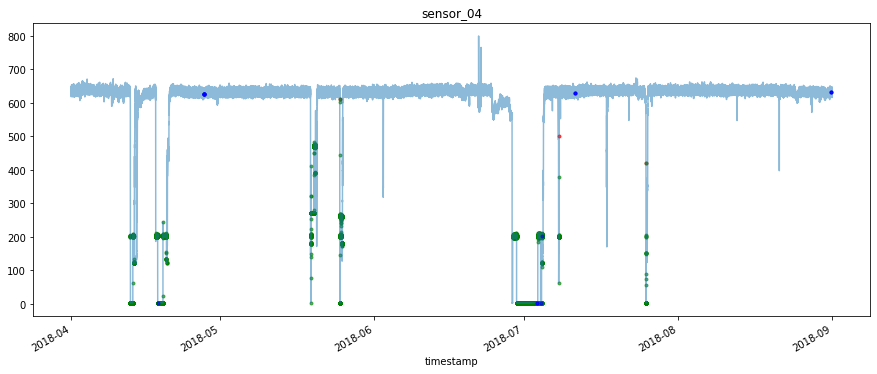

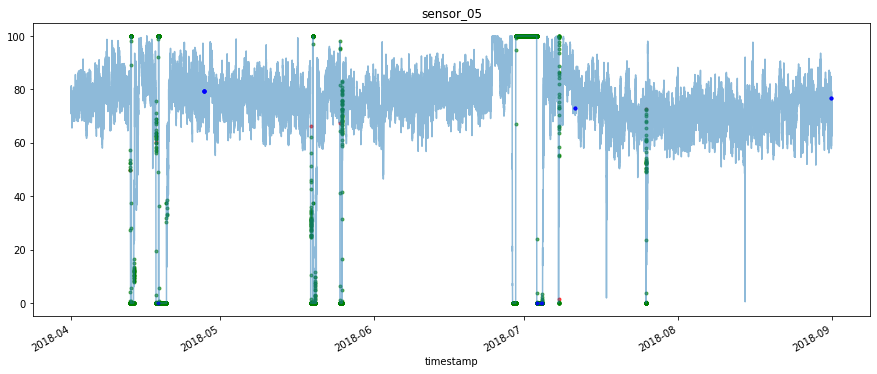

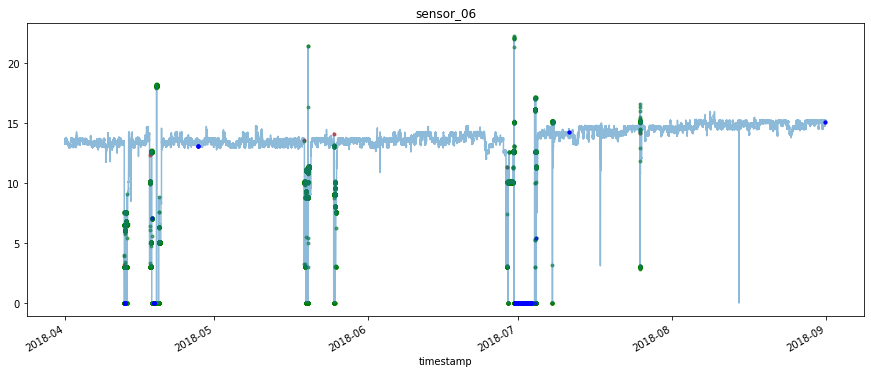

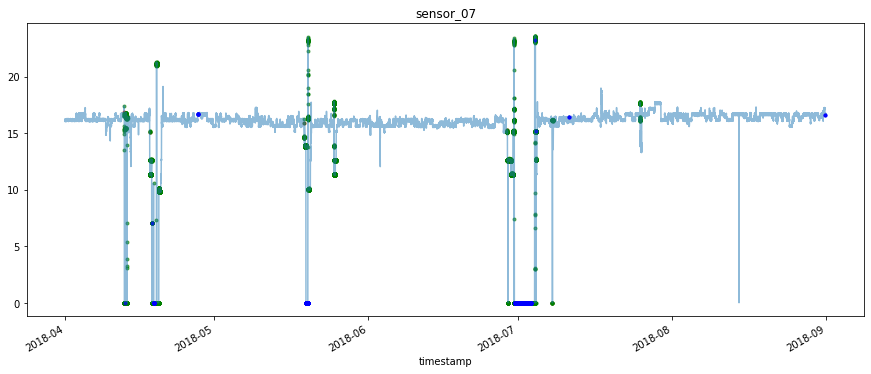

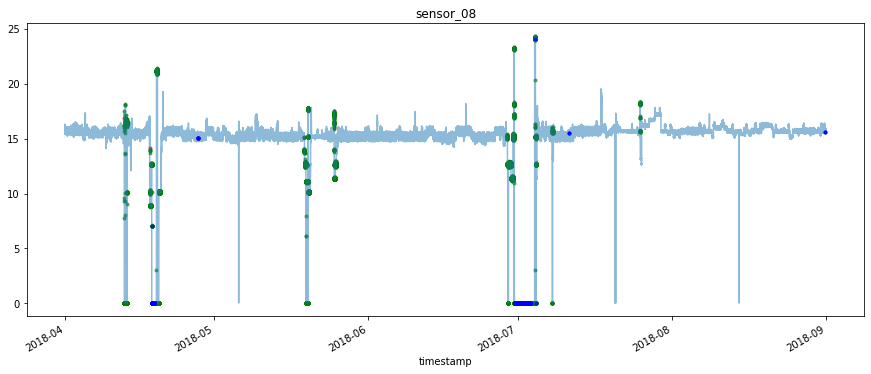

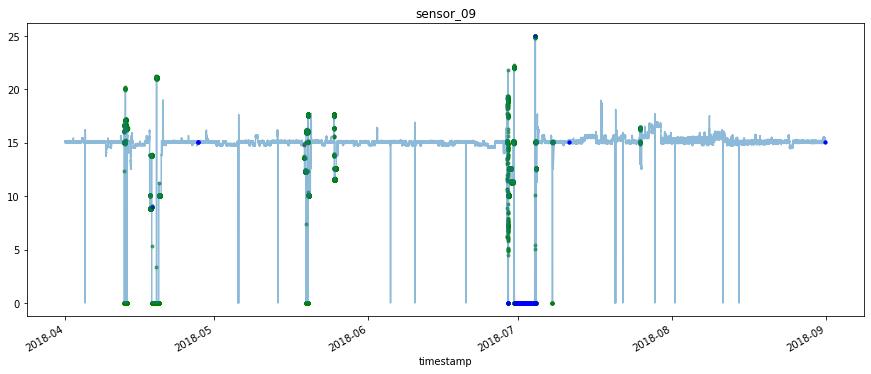

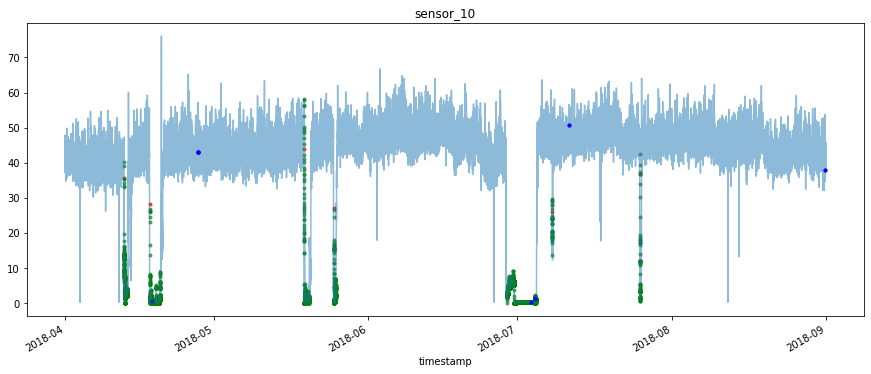

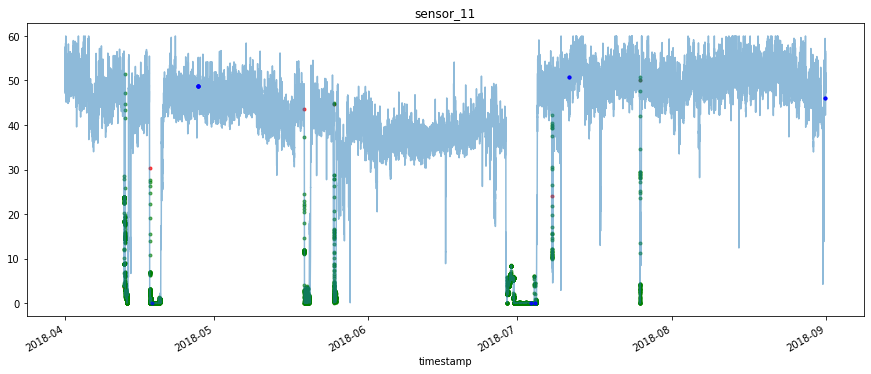

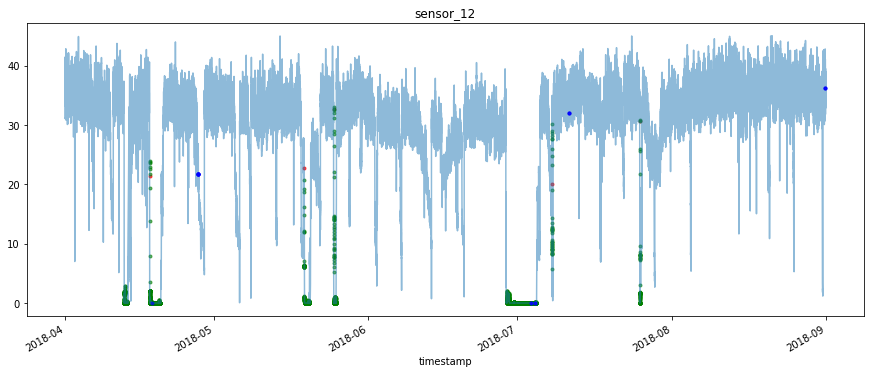

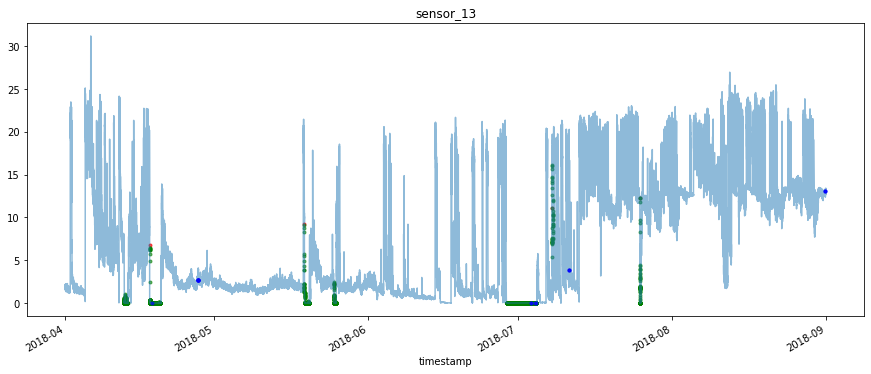

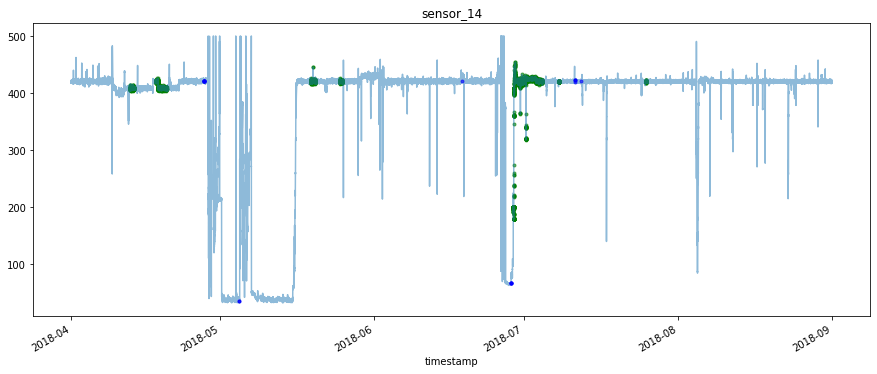

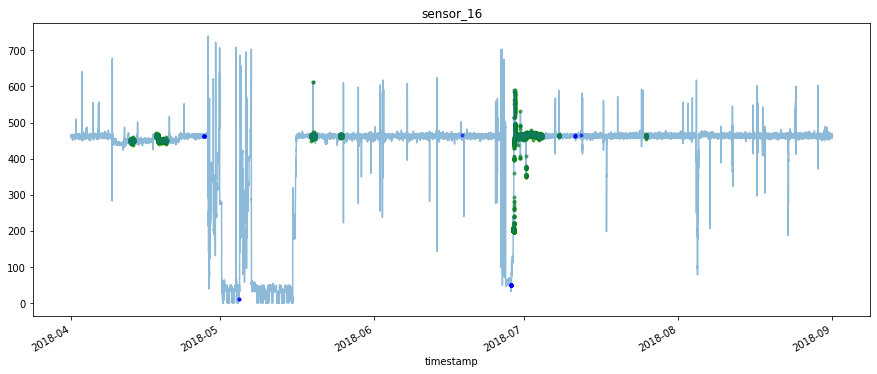

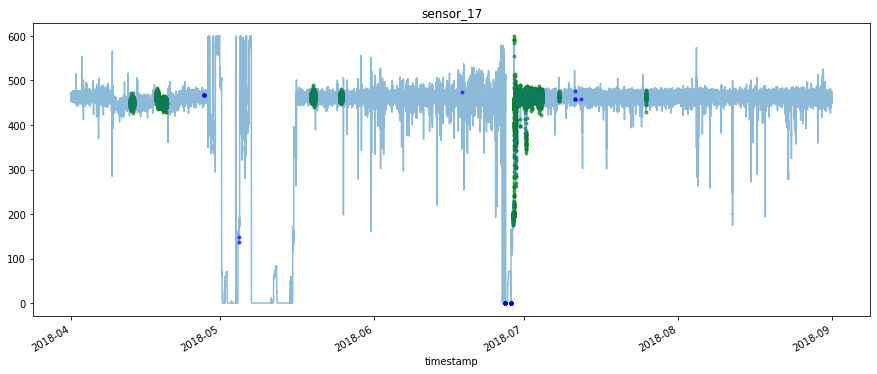

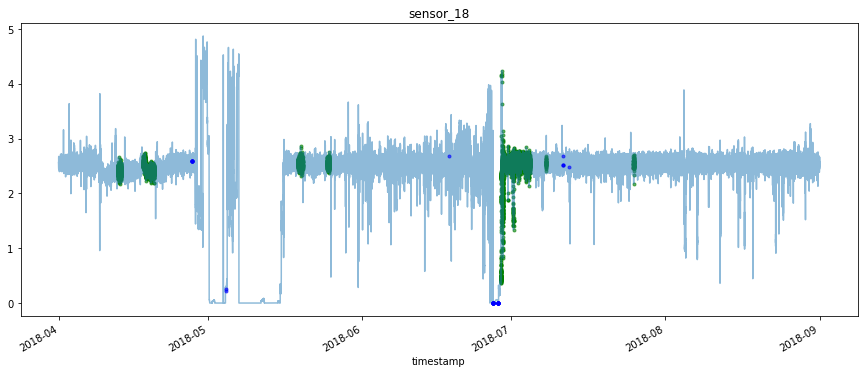

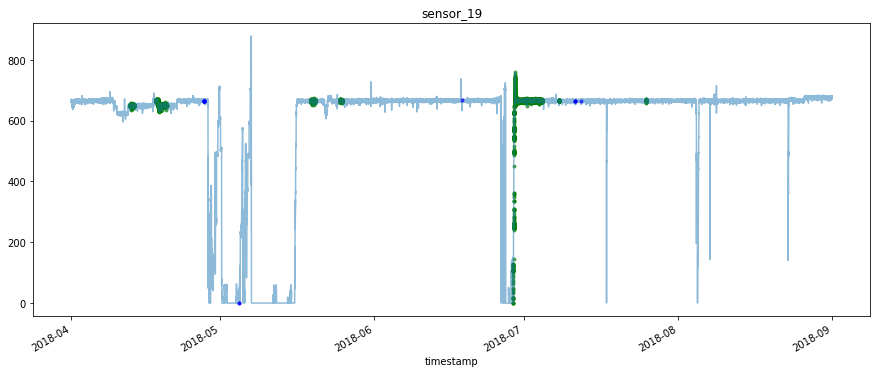

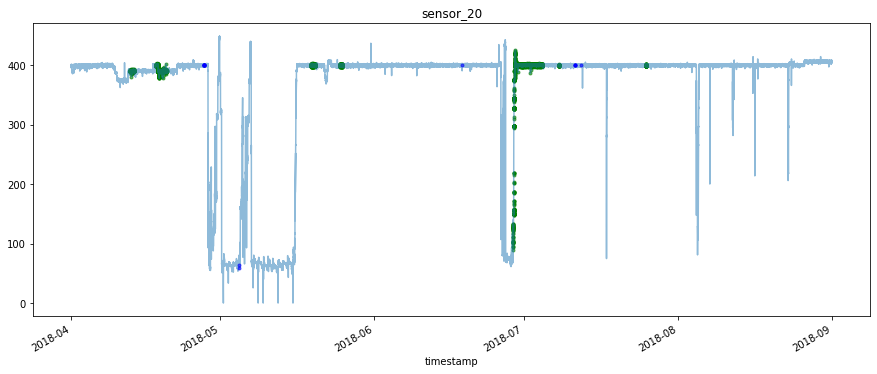

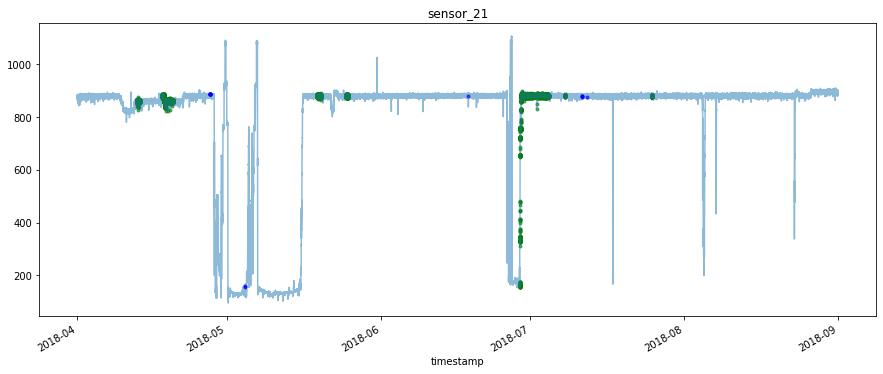

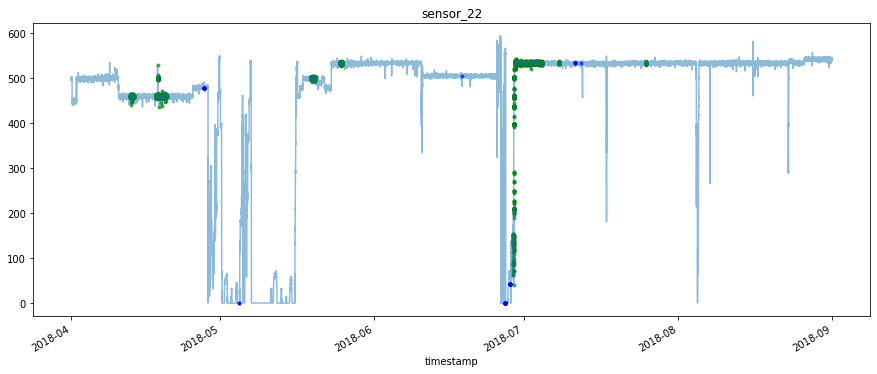

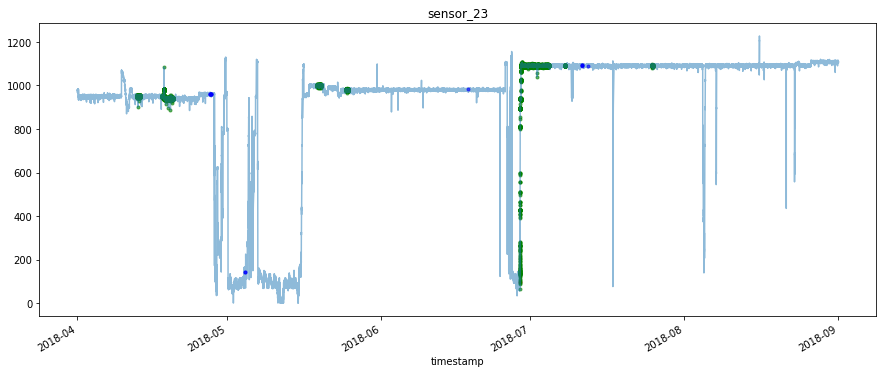

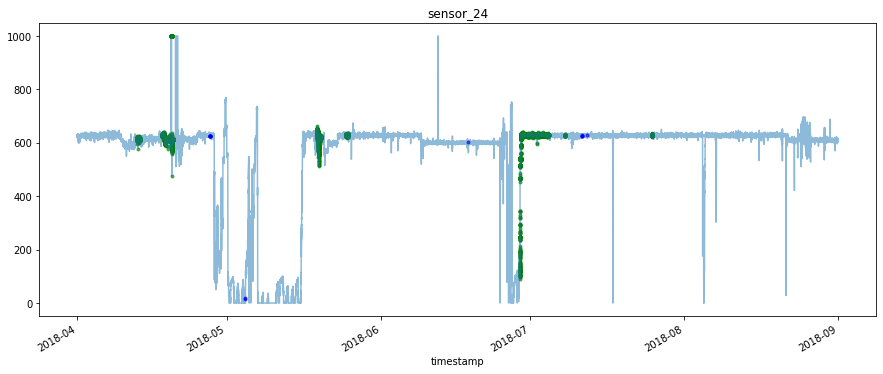

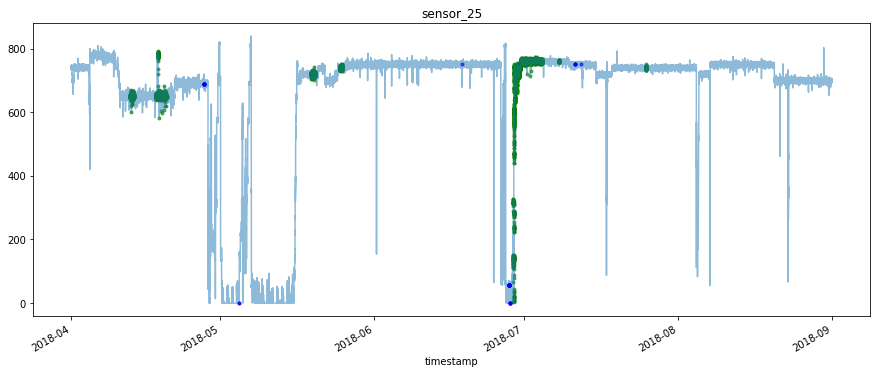

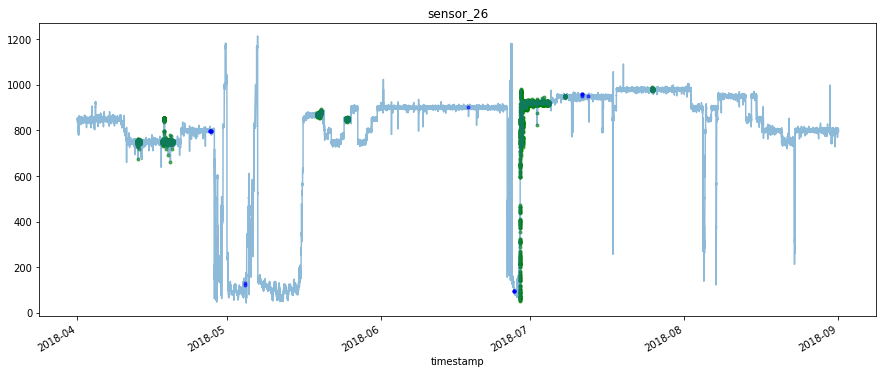

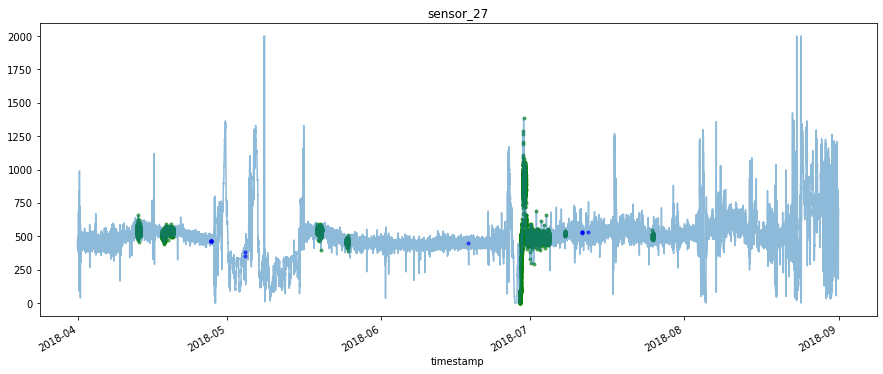

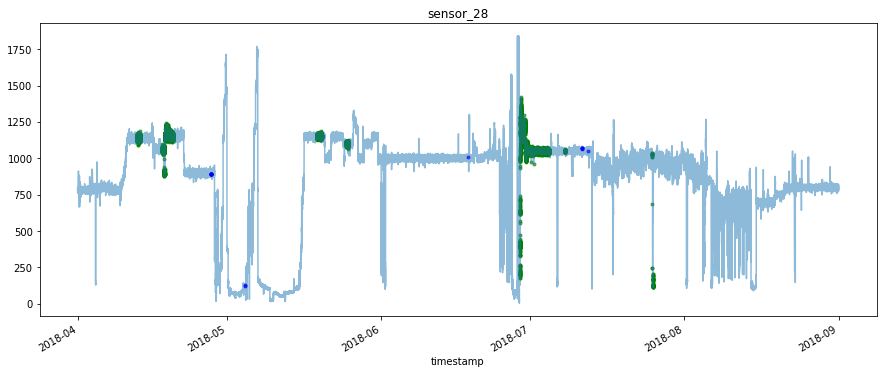

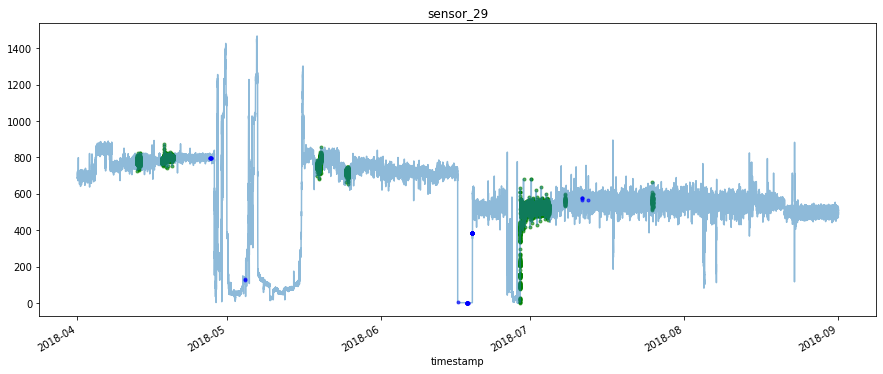

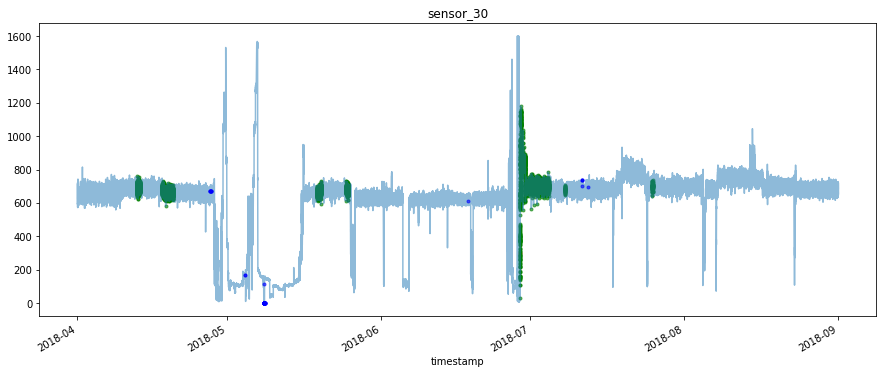

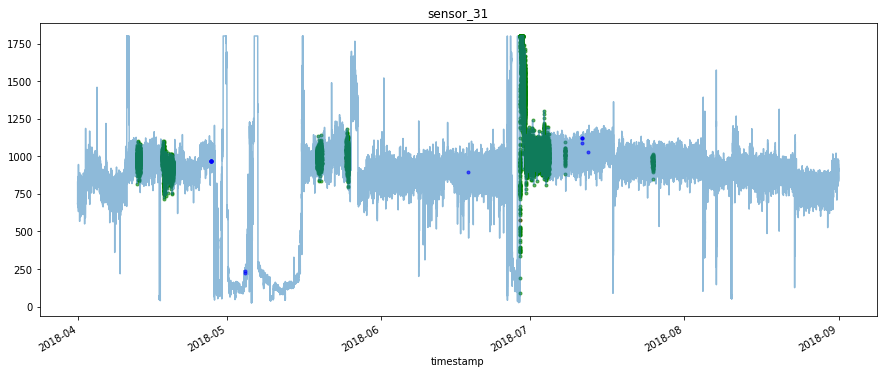

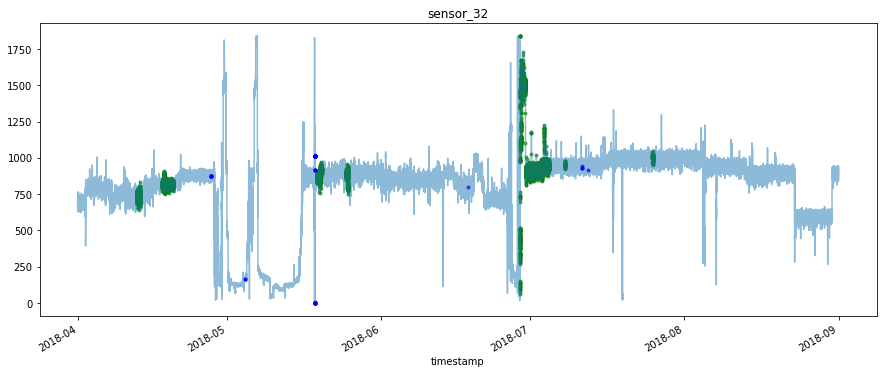

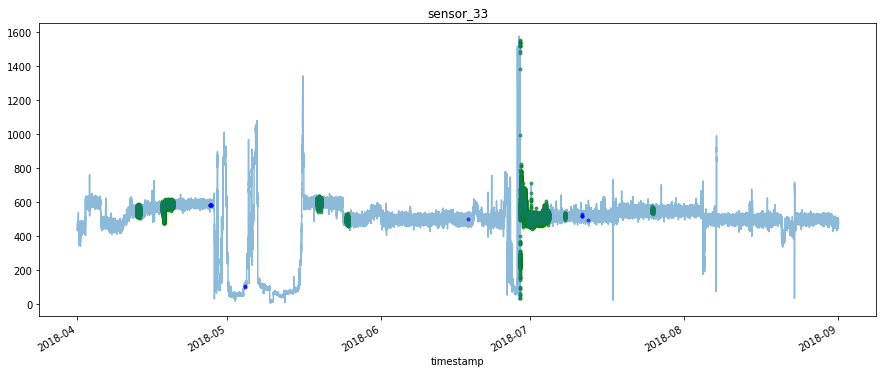

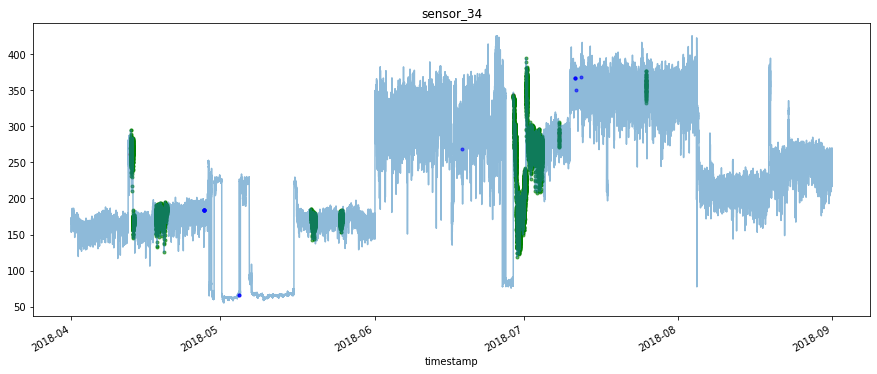

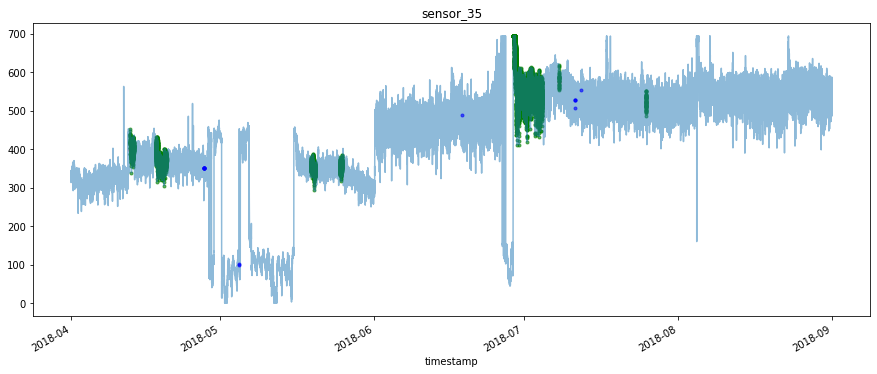

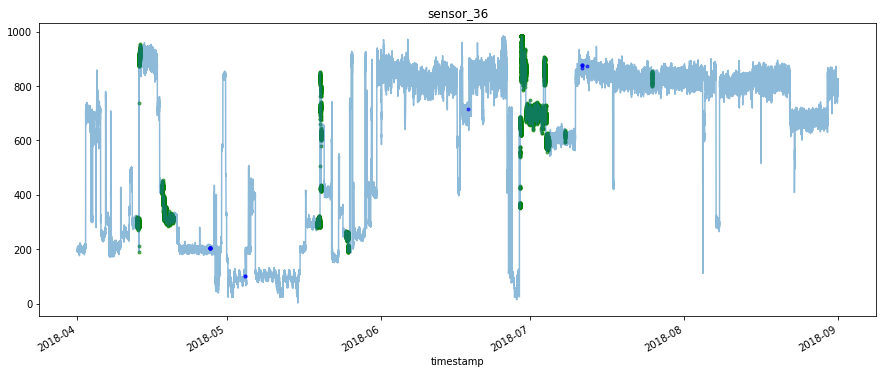

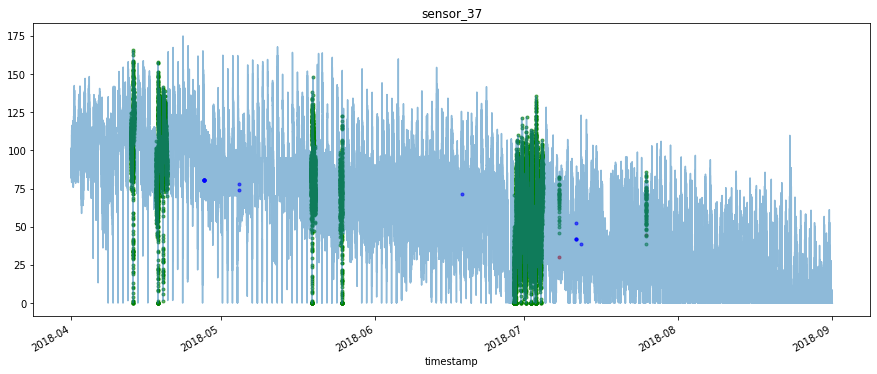

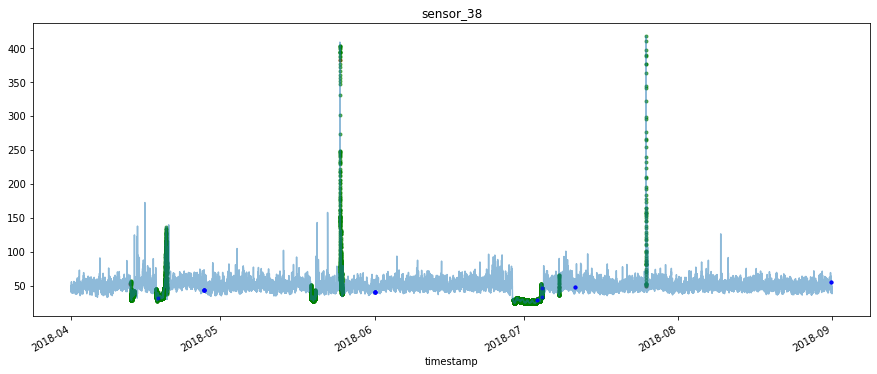

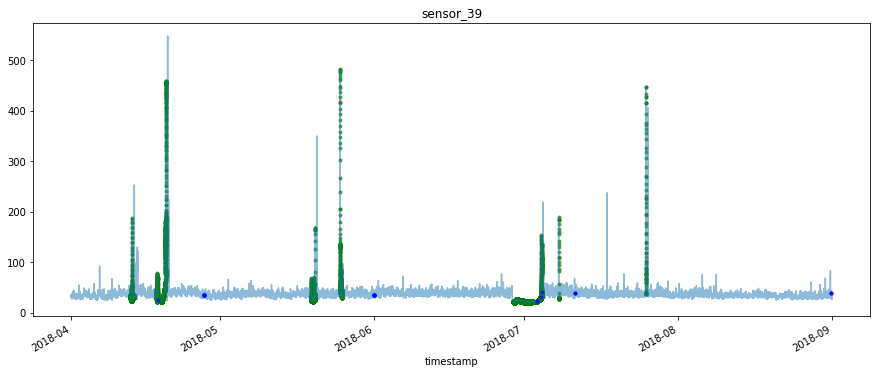

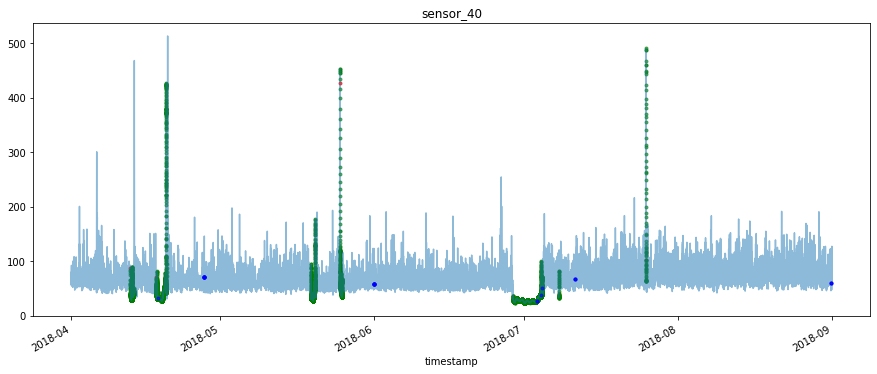

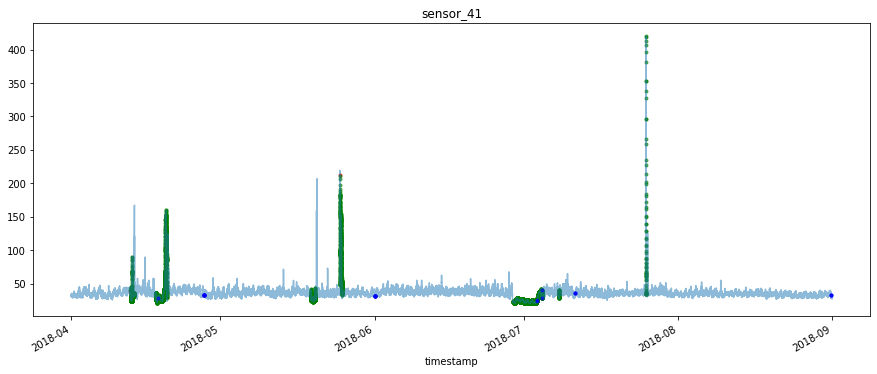

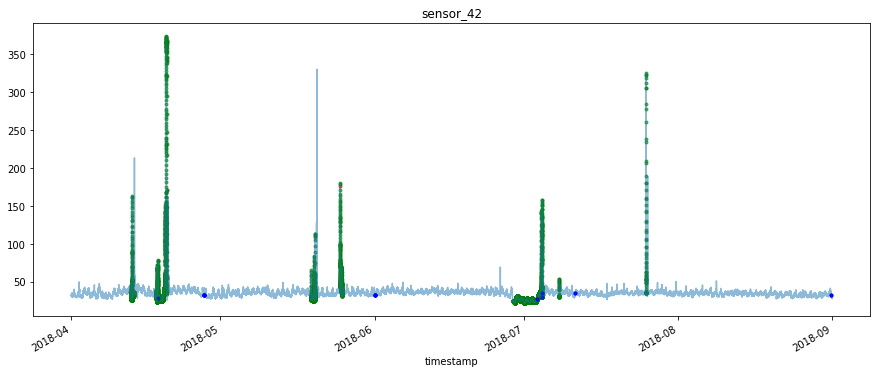

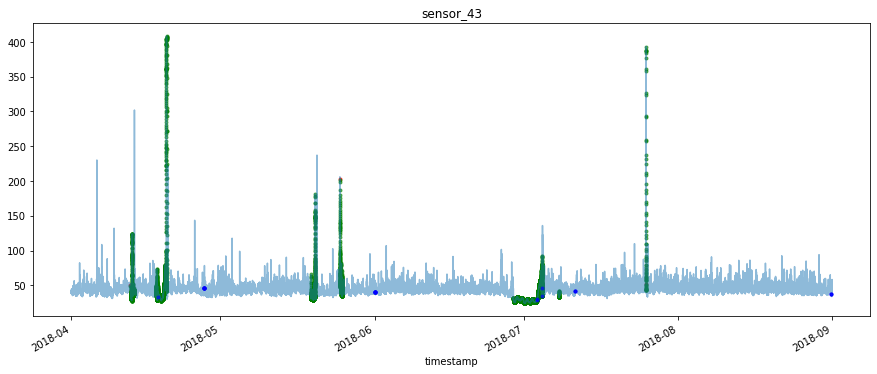

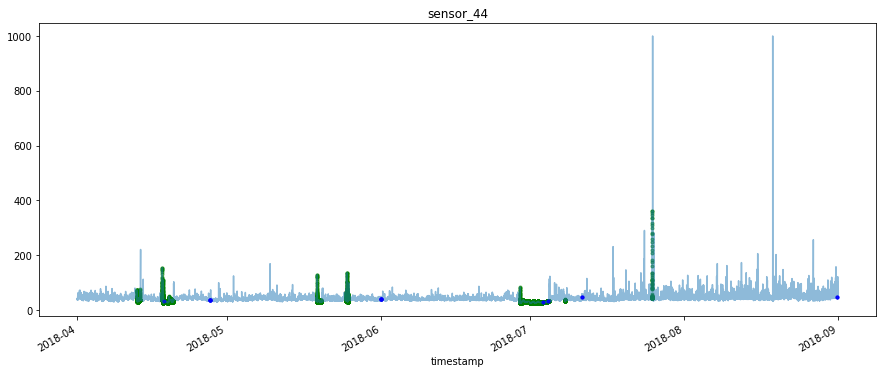

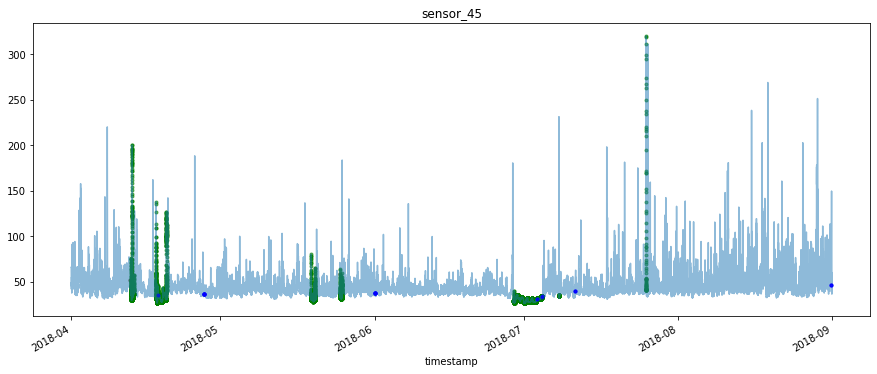

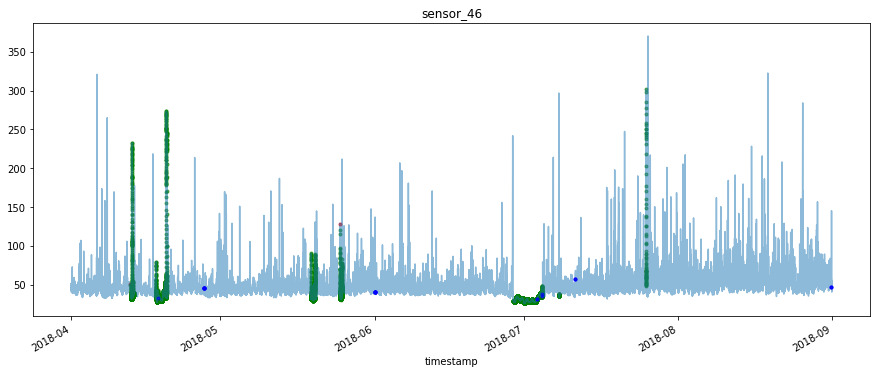

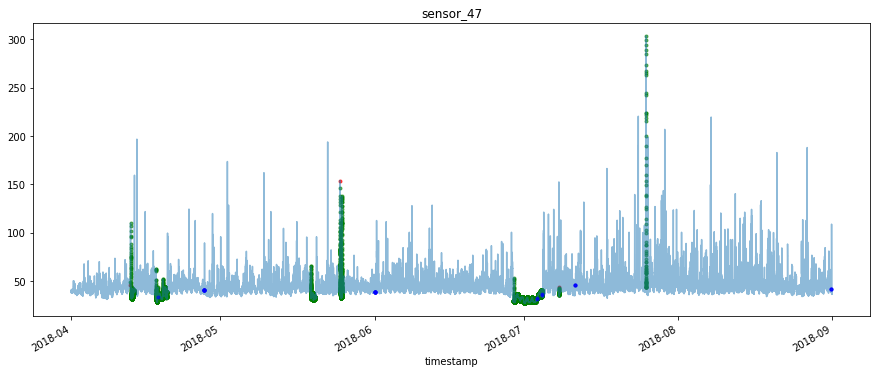

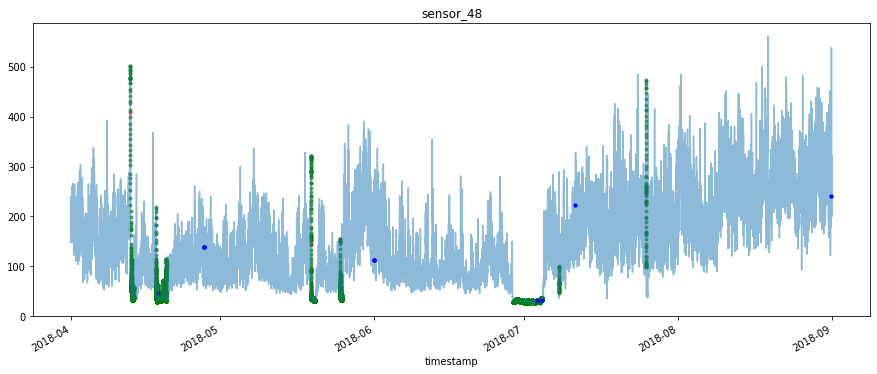

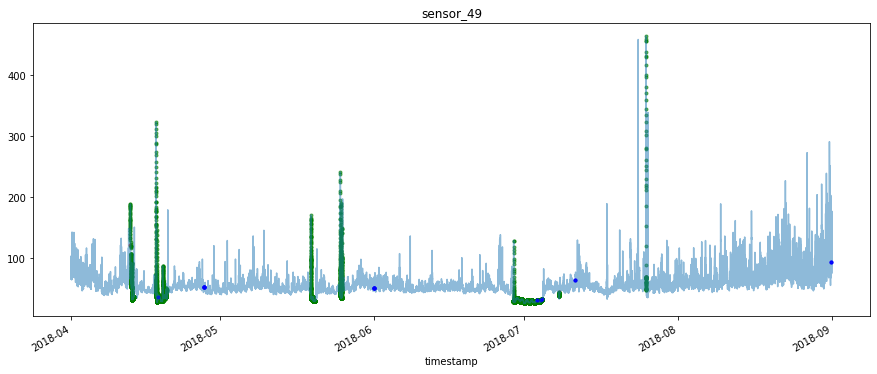

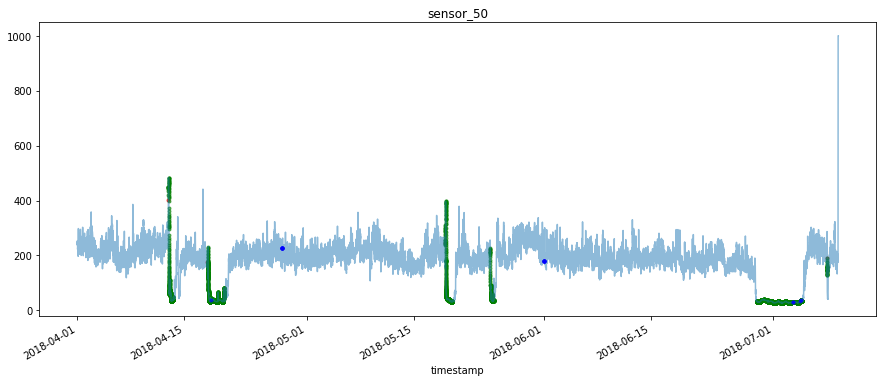

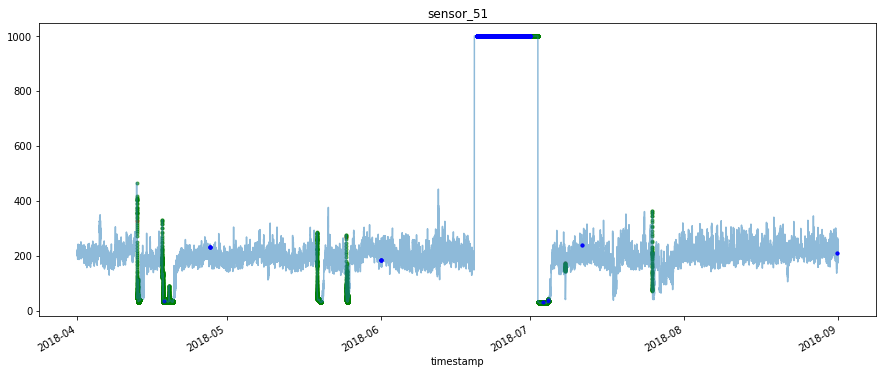

In [24]:
plt.rcParams['figure.figsize'] = (15, 6)
plt.figure(figsize=(15,4))
for data_info in data_df_encod.columns:
    
    data_sensor = data_df_encod[data_info].bfill()
    
    anomalies = data_sensor[(data_df_encod_labels==0)]
    anomalies.plot(marker='.', linestyle='none', c="r", alpha=0.7)
    anomalies = data_sensor[(data_df_encod_labels==2) ]
    anomalies.plot(marker='.', linestyle='none', c="g", alpha=0.6)
    
    data_sensor.plot(alpha=0.5)

    data_null = data_df_encod[data_info].fillna(-1)
    anomalies = data_sensor[(data_null==-1) ]

    anomalies.plot(marker='.', linestyle='none', c="b", alpha=0.6)
    
    plt.title(data_info)
    plt.show()

# Dataset Analysis

In [9]:
data_df_encod.describe()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51
count,210112.000000,219951.000000,220301.000000,220301.000000,220301.000000,220301.000000,215522.000000,214869.000000,215213.000000,215725.000000,...,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,143303.000000,204937.000000
mean,2.372221,47.591611,50.867392,43.752481,590.673936,73.396414,13.501537,15.843152,15.200721,14.799210,...,35.453455,43.879591,42.656877,43.094984,48.018585,44.340903,150.889044,57.119968,183.049260,202.699667
std,0.412227,3.296666,3.666820,2.418887,144.023912,17.298247,2.163736,2.201155,2.037390,2.091963,...,10.259521,11.044404,11.576355,12.837520,15.641284,10.442437,82.244957,19.143598,65.258650,109.588607
min,0.000000,0.000000,33.159720,31.640620,2.798032,0.000000,0.014468,0.000000,0.028935,0.000000,...,22.135416,24.479166,25.752316,26.331018,26.331018,27.199070,26.331018,26.620370,27.488426,27.777779
25%,2.438831,46.310760,50.390620,42.838539,626.620400,69.976260,13.346350,15.907120,15.183740,15.053530,...,32.812500,39.583330,36.747684,36.747684,40.509258,39.062500,83.912030,47.743060,167.534700,179.108800
50%,2.456539,48.133678,51.649300,44.227428,632.638916,75.576790,13.642940,16.167530,15.494790,15.082470,...,35.156250,42.968750,40.509260,40.219910,44.849540,42.534720,138.020800,52.662040,193.865700,197.338000
75%,2.499826,49.479160,52.777770,45.312500,637.615723,80.912150,14.539930,16.427950,15.697340,15.118630,...,36.979164,46.614580,45.138890,44.849540,51.215280,46.585650,208.333300,60.763890,219.907400,216.724500
max,2.549016,56.727430,56.032990,48.220490,800.000000,99.999880,22.251160,23.596640,24.348960,25.000000,...,374.218800,408.593700,1000.000000,320.312500,370.370400,303.530100,561.632000,464.409700,1000.000000,1000.000000


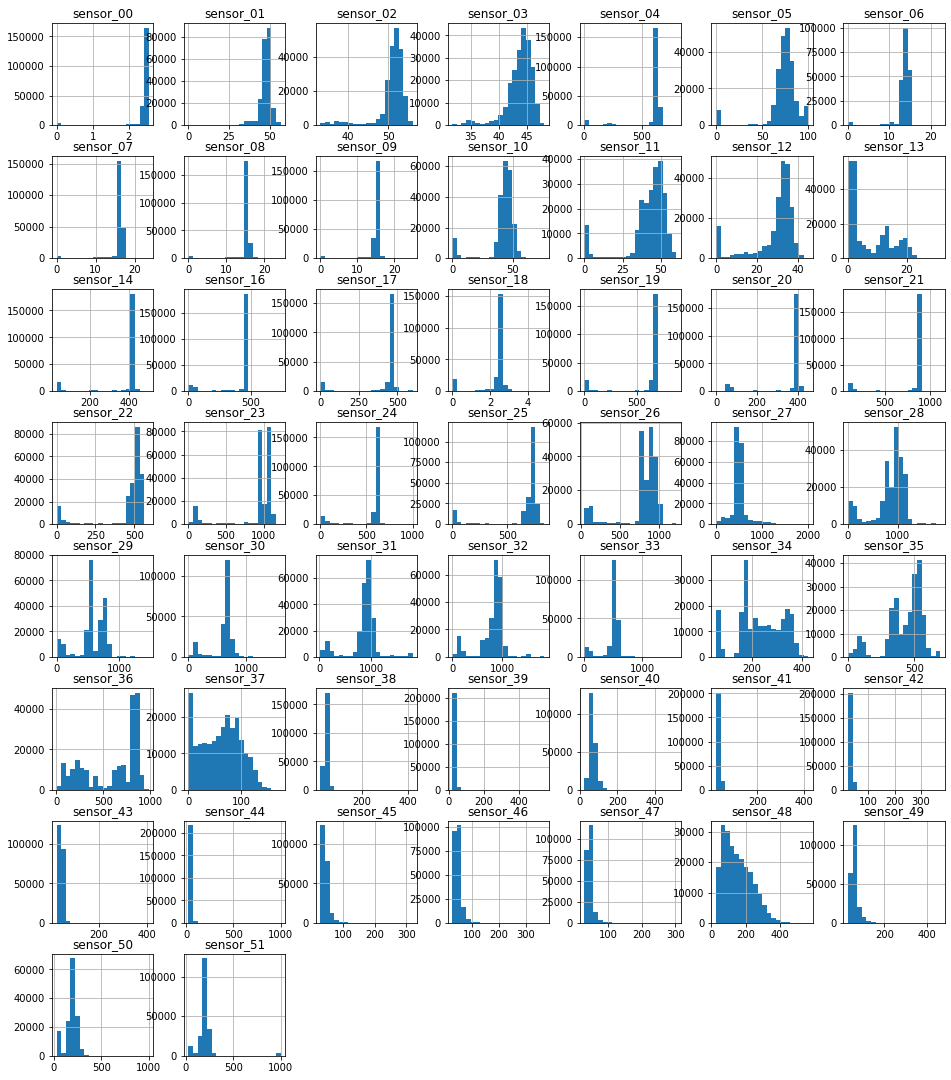

In [10]:
data_df_encod.hist(bins = 20 , figsize= (16,19)) ;

In [11]:
data_df_encod.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 220320 entries, 2018-04-01 00:00:00 to 2018-08-31 23:59:00
Data columns (total 51 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   sensor_00  210112 non-null  float64
 1   sensor_01  219951 non-null  float64
 2   sensor_02  220301 non-null  float64
 3   sensor_03  220301 non-null  float64
 4   sensor_04  220301 non-null  float64
 5   sensor_05  220301 non-null  float64
 6   sensor_06  215522 non-null  float64
 7   sensor_07  214869 non-null  float64
 8   sensor_08  215213 non-null  float64
 9   sensor_09  215725 non-null  float64
 10  sensor_10  220301 non-null  float64
 11  sensor_11  220301 non-null  float64
 12  sensor_12  220301 non-null  float64
 13  sensor_13  220301 non-null  float64
 14  sensor_14  220299 non-null  float64
 15  sensor_16  220289 non-null  float64
 16  sensor_17  220274 non-null  float64
 17  sensor_18  220274 non-null  float64
 18  sensor_19  220304 non-null  fl

In [12]:
data_df_encod['machine_status'] = data_df_encod_labels
#Remplace nan values
data_df_encod = data_df_encod.bfill()

# Sensors - outliers of samples

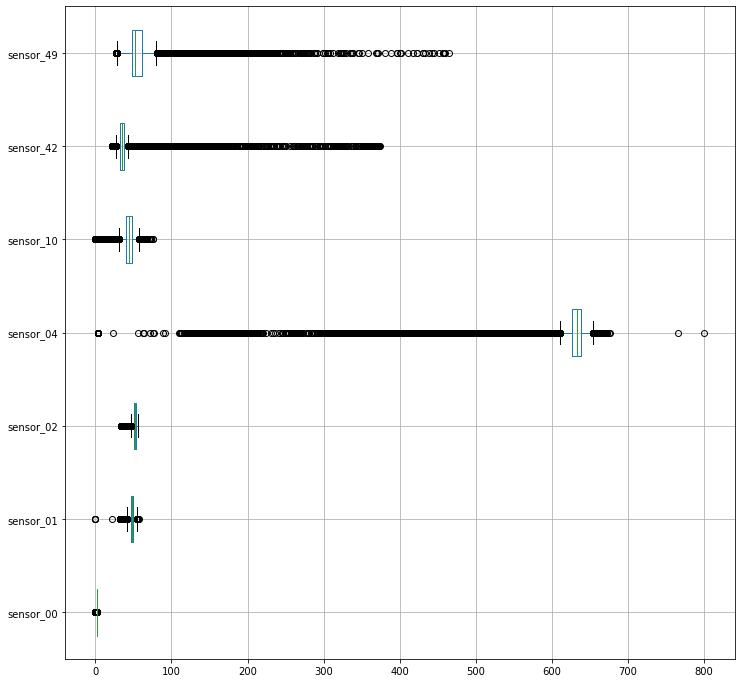

In [13]:
plt.figure(figsize=(12,12))
data_df_encod[["sensor_00", "sensor_01", 
               "sensor_02", "sensor_04",
               "sensor_10", "sensor_42", 
               "sensor_49"]].boxplot(vert=False);

# Analys sensor 28

Number of outliers more than the 95% 11016
Number of outliers less than the 5% 11016
1    205836
2     14477
0         7
Name: machine_status, dtype: int64


<AxesSubplot:xlabel='timestamp'>

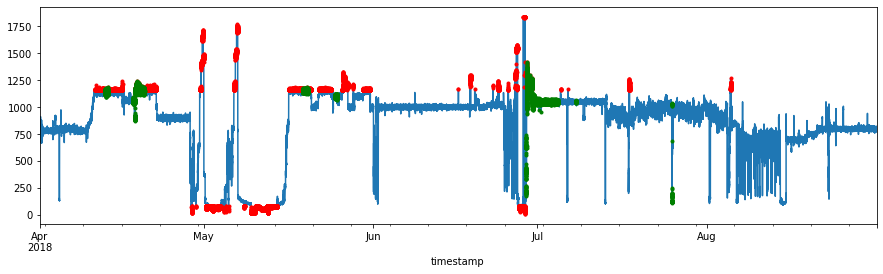

In [16]:
plt.figure(figsize=(15,4))
#Number of outliers more than the 95%
q_95 = data_df_encod["sensor_28"].quantile(q=0.95)
q_05 = data_df_encod["sensor_28"].quantile(q=0.05)
outliers_h = data_df_encod[data_df_encod["sensor_28"]> q_95]["sensor_28"]
print('Number of outliers more than the 95%', outliers_h.count())

#Number of outliers less than the 5%
outliers_l = data_df_encod[data_df_encod["sensor_28"]< q_05]["sensor_28"]
print('Number of outliers less than the 5%',outliers_l.count())


data_df_encod["sensor_28"].plot();
outliers_h.plot(marker='.', linestyle='none', c="r")
outliers_l.plot(marker='.', linestyle='none', c="r")

print(data_df_encod['machine_status'].value_counts())

#Detect anomalies points
anomalies = data_df_encod[(data_df_encod['machine_status']==2) | (data_df_encod['machine_status']==0)]["sensor_28"]
anomalies.plot(marker='.', linestyle='none', c="g")

In [17]:
intersection = (anomalies.index).intersection(outliers_h.index)
intersection.size

print('Anomalies points:', anomalies.size)
print('Outliers hight:', outliers_h.size)
print('Intersection anomalies points:', intersection.size)
print('% Anomalies detected: {:.2f}%'. format(intersection.size*100/anomalies.size))

Anomalies points: 14484
Outliers hight: 11016
Intersection anomalies points: 2857
% Anomalies detected: 19.73%


In [22]:
from statsmodels.tsa.stattools import adfuller

sensors = ["sensor_00","sensor_01", "sensor_02", 
           "sensor_04", "sensor_10",
           "sensor_42", "sensor_49"]

for sensor in sensors:
    print("Sensor: {}".format(sensor))
    result = adfuller(data_df_encod[sensor])
    #Dickey-Fuller 
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print(result[1] <= 0.05)
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    print("-"*10)

Sensor: sensor_00
ADF Statistic: -6.047351
p-value: 0.000000
True
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
----------
Sensor: sensor_01
ADF Statistic: -6.040055
p-value: 0.000000
True
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
----------
Sensor: sensor_02
ADF Statistic: -4.106830
p-value: 0.000944
True
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
----------
Sensor: sensor_04
ADF Statistic: -6.560465
p-value: 0.000000
True
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
----------
Sensor: sensor_10
ADF Statistic: -8.274162
p-value: 0.000000
True
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
----------
Sensor: sensor_42
ADF Statistic: -28.258073
p-value: 0.000000
True
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
----------
Sensor: sensor_49
ADF Statistic: -19.295402
p-value: 0.000000
True
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
----------
